In [1]:
import random
import sys
sys.path.insert(0,'/home/zahradnik/PycharmProjects/master_thesis')

In [2]:
from src.modules import conf, fit, df_columns, evl, preprocess
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import scipy
warnings.simplefilter("ignore")

/home/zahradnik/PycharmProjects/master_thesis/src/modules/__init__.py
/home/zahradnik/PycharmProjects/master_thesis


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [5]:
data = fit.load_pcls(
        athlete_name='zahradnik',
        activity_type='running',
        path_to_load=conf["Paths"]["pcl"],
    )

100%|██████████| 386/386 [00:00<00:00, 518.78it/s]


In [6]:
len(data[0])

831

In [7]:
preprocess.segment_elev(data[0])    

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.0,
 0,
 0,
 0,

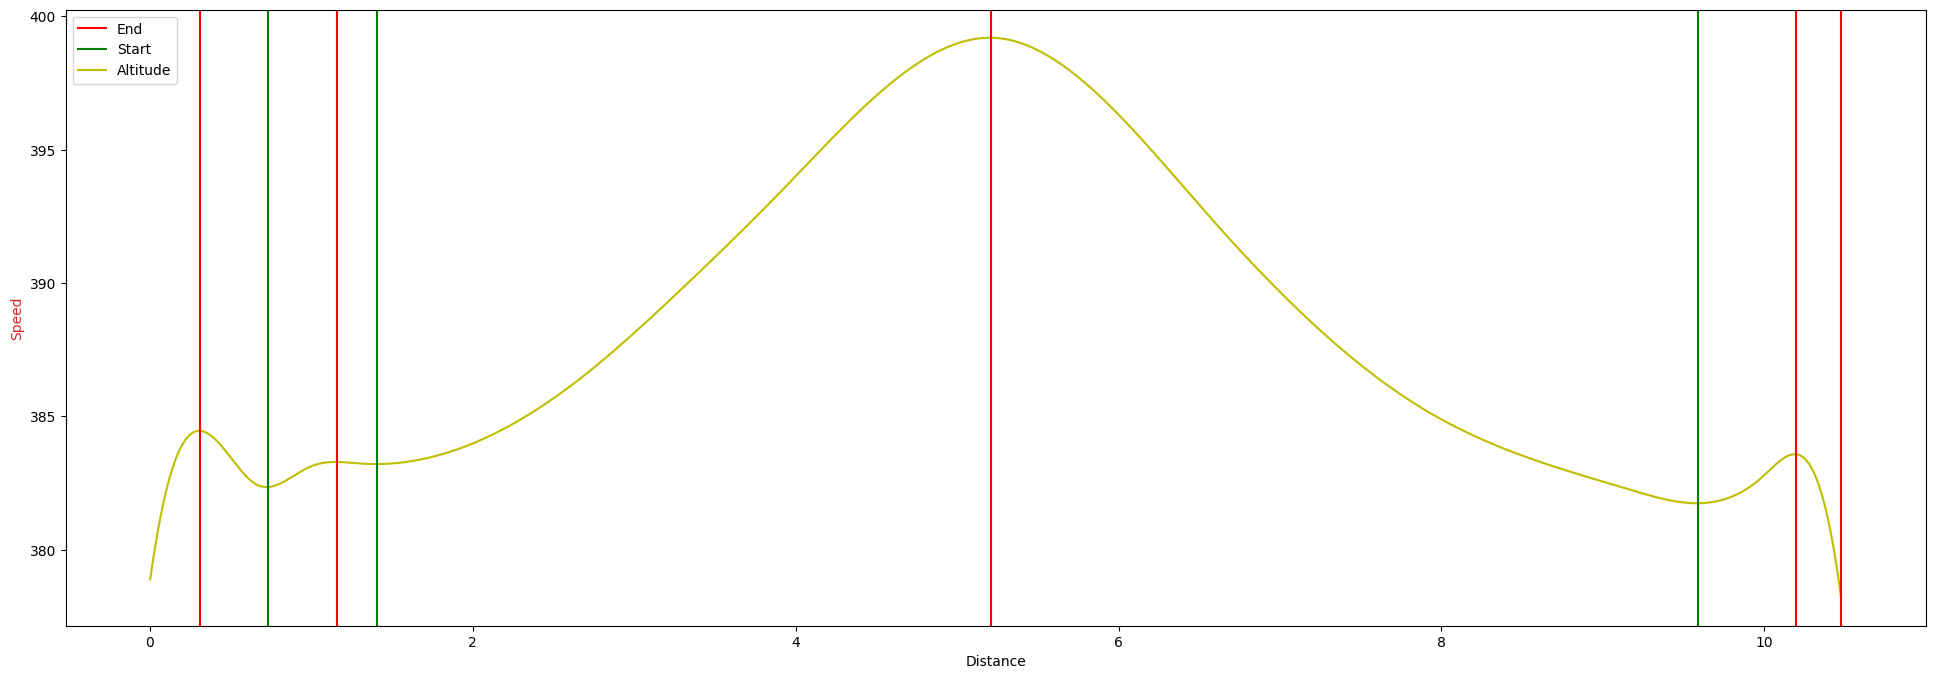

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate

def isMonotonic(A):
    return all(A[i] <= A[i + 1] for i in range(len(A) - 1)) or all(A[i] >= A[i + 1] for i in range(len(A) - 1))

df = data[-13]
altitude = df.enhanced_altitude
x_axis = np.linspace(min(df.distance)/1000, max(df.distance)/1000, len(df))
spl = scipy.interpolate.UnivariateSpline(x_axis, altitude)
altitude = spl(x_axis)
curve_alt, = plt.plot(x_axis, altitude, 'y', label='Altitude')

plt.xlabel("Distance")
plt.ylabel("Speed", color="tab:red")

segments = [(0, 0)]  # Initialize with a dummy segment
legend_handles = {}

for x in range(1, len(altitude)):
    if not isMonotonic(altitude[segments[-1][1]:x]):
        sign = -1 * np.sign(altitude[segments[-1][1]] - altitude[x])
        label = "Start" if sign == -1 else "End"
        color = 'g' if sign == -1 else 'r'
        curve = plt.axvline(x=x_axis[x], color=color, label=label)
        segments[-1] = (segments[-1][0], x)
        legend_handles[label] = curve

curve = plt.axvline(x=x_axis[x], color="r", label="End")
legend_handles["End"] = curve
segments.pop(0)  # Remove the dummy segment

legend_handles["Altitude"] = curve_alt
plt.legend(legend_handles.values(), legend_handles.keys(), loc='best')

In [9]:
def isMonotonic(A):
    return all(A[i] <= A[i + 1] for i in range(len(A) - 1)) or all(A[i] >= A[i + 1] for i in range(len(A) - 1))

df = data[-13]
altitude = df.enhanced_altitude
x_axis = np.linspace(min(df.distance)/1000, max(df.distance)/1000, len(df))

segments = [(0, 0)]

for x in range(0, len(altitude)):
    if not isMonotonic(altitude[segments[-1][1]:x]):
        sign = -1 * np.sign(altitude[segments[-1][1]] - altitude[x])
        df["peak"][segments[-1][1]:x] = sign
        segments[-1] = (segments[-1][0], x)
        

In [99]:
preprocess.segment_elev(data[-5]).peak

timestamp
2023-08-24 07:02:36    0.0
2023-08-24 07:02:37    0.0
2023-08-24 07:02:38    0.0
2023-08-24 07:02:39    0.0
2023-08-24 07:02:40    0.0
                      ... 
2023-08-24 08:12:02    0.0
2023-08-24 08:12:03    0.0
2023-08-24 08:12:04    0.0
2023-08-24 08:12:05    0.0
2023-08-24 08:12:06    0.0
Name: peak, Length: 3557, dtype: float64